In [2]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
import sys
np.set_printoptions(threshold=sys.maxsize)

In [3]:
#initialize the values
N = 100
D = 1
dx = 1/N
w = 1.9
e = 10**(-5)
eta = 2
max_iter = (N*N)/2

In [4]:
def init(N):
    grid = np.zeros((N,N))
    for i in range(0,N-1):
        y = 1 - (i /N)
        grid[i] = np.full((1,N),y)
    return(grid)
grid = init(N)

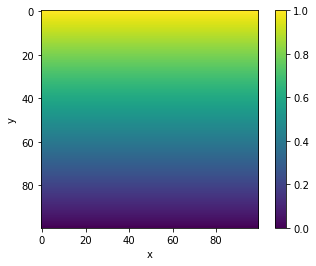

In [13]:
plt.imshow(grid,vmin=0, vmax=1)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

In [5]:
def update_SOR(Y, w, seed):
    '''
    The SOR method grid update function
    Args:
        -Y, the grid at the current timestep
        -w, the omega constant
        -N, the size of the grid
    Out:
        -Y, the grid at the next timestep
    '''
    
    #update the grid at position i, j and take boundary conditions into account
    for j in range(1, len(Y)-1):
        for i in range(len(Y)):
            if i == 0:
                 Y[j,i] = (1-w)*Y[j,i] + (w/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,i+1] + Y[j,-1]) 
            elif i == N-1:
                 Y[j,i] = (1-w)*Y[j,i] + (w/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,0] + Y[j,i-1]) 
            else:
                 Y[j,i] = (1-w)*Y[j,i] + (w/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,i+1] + Y[j,i-1])  
            if Y[j,i]<0:
                Y[j,i] = 0    
            # kijken of we een beter implementatie kunnen regelen voor dit
            for s in seed:
                Y[int(s[0]),int(s[1])] = 0
    return(Y)  

In [6]:
def neighbours_function(new_s, Y, neighbours):
    if int(new_s[0]) == 0:
        if int(new_s[1]) ==0:
            if Y[int(new_s[0]),len(Y)-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),len(Y)-1]])
            if Y[int(new_s[0]),int(new_s[1])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+1]])  
            if Y[int(new_s[0])+1,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])
        elif int(new_s[1]) == len(Y)-1:
            if Y[int(new_s[0]),int(new_s[1])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])
            if Y[int(new_s[0]),0]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),0]])  
            if Y[int(new_s[0])+1,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])            
        else:
            if Y[int(new_s[0]),int(new_s[1])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+1]])
            if Y[int(new_s[0]),int(new_s[1])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])  
            if Y[int(new_s[0])+1,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])
    elif int(new_s[0]) == len(Y)-1:
        if int(new_s[1]) ==0:
            if Y[int(new_s[0]),len(Y)-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),len(Y)-1]])
            if Y[int(new_s[0]),int(new_s[1])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+1]])  
            if Y[int(new_s[0])-1,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])-1,int(new_s[1])]])
        elif int(new_s[1]) == len(Y)-1:
            if Y[int(new_s[0]),int(new_s[1])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])
            if Y[int(new_s[0]),0]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),0]])  
            if Y[int(new_s[0])-1,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])-1,int(new_s[1])]])            
        else:
            if Y[int(new_s[0]),int(new_s[1])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+1]])
            if Y[int(new_s[0]),int(new_s[1])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])  
            if Y[int(new_s[0])-1,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])-1,int(new_s[1])]])           
    elif int(new_s[1]) == 0:
        if Y[int(new_s[0]),len(Y)-1]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0]),len(Y)-1]])
        if Y[int(new_s[0]),new_s[1]+1]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0]),new_s[1]+1]])  
        if Y[int(new_s[0])-1,int(new_s[1])]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0])-1,int(new_s[1])]])
        if Y[int(new_s[0])+1,int(new_s[1])]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])
    elif int(new_s[1]) == len(Y):
        if Y[int(new_s[0]),0]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0]),0]])
        if Y[int(new_s[0]),int(new_s[1])-1]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])  
        if Y[int(new_s[0])-1,int(new_s[1])]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0])-1,int(new_s[1])]])
        if Y[int(new_s[0])+1,int(new_s[1])]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])           
    else:
        for i in [-1,1]:
            if Y[int(new_s[0])+i,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])+i,int(new_s[1])] ])
            if Y[int(new_s[0]),int(new_s[1])+i]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+i]] )
    return neighbours


In [7]:
def growth(Y, seed, neighbours, eta):
    total = 0
    prop = []
    for s in seed:
        Y[int(s[0]),int(s[1])] = 0

    for n in neighbours:
        total += abs((Y[int(n[0]),int(n[1])])**eta)
        c_ij = (Y[int(n[0]),int(n[1])])**eta
        prop.append(abs(c_ij))
    prop = prop/total

    index = random.choice(np.arange(len(neighbours)), p = prop)
    new_s = neighbours[index] 
    seed = np.vstack([seed, new_s])
    neighbours = np.delete(neighbours, index, axis = 0)
    neighbours =  neighbours_function(new_s, Y, neighbours)
    return Y, seed, neighbours


In [8]:
def itter(seed, Y, eta, max_iter, neighbours, w):
    k = 0
    for i in range(int(max_iter)):
        Y, seed, neighbours = growth(Y, seed, neighbours, eta)
        Y = update_SOR(Y, w, seed)
        k = k + 1
        for s in seed:
            if s[0]==1:
                break
        else:
            continue
        break
    seed_grid = np.zeros((N,N))
    
    for i in seed:
        seed_grid[int(i[0]), int(i[1])]=1
        
    plt.imshow(seed_grid,vmin=0, vmax=1)
    plt.xlabel("x")
    plt.ylabel("y")
#     plt.colorbar()
    plt.show()
    
    plt.imshow(Y,vmin=0, vmax=1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    plt.show()
    return k

In [9]:
Y = np.copy(grid)
seed = np.array([[N-1,round((N-1)/2)]])
neighbours= np.array([[N-2, round((N-1)/2)], [round(N-1),round((N-1)/2)-1], [round(N-1),round((N-1)/2)+1]])

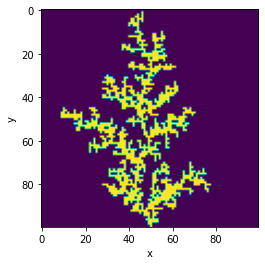

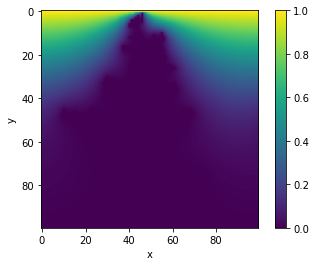

for a w of  1.8 we needed k= 1333 iterations


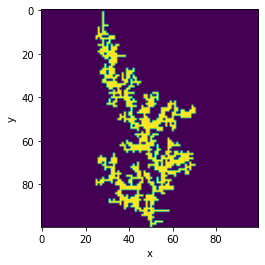

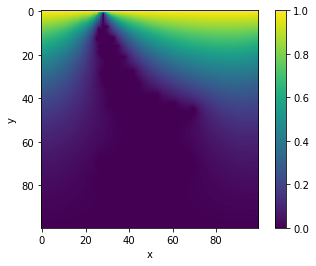

for a w of  1.85 we needed k= 1050 iterations


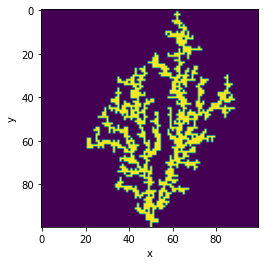

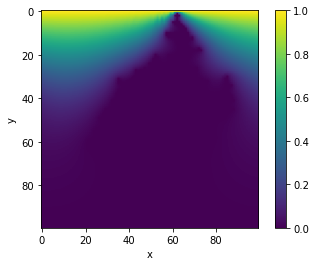

for a w of  1.9 we needed k= 1357 iterations


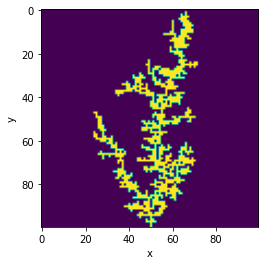

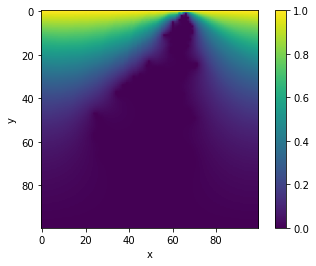

for a w of  1.95 we needed k= 1030 iterations


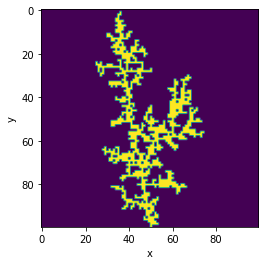

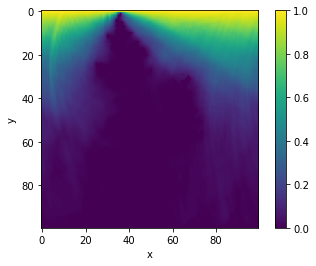

for a w of  2 we needed k= 1043 iterations


In [9]:
w_list = [1.8, 1.85, 1.9, 1.95,2]
for w in w_list:
    Y = np.copy(grid)
    k = itter(seed, Y, 1, max_iter, neighbours, w)
    print("for a w of ", w, "we needed k=", k ,"iterations")

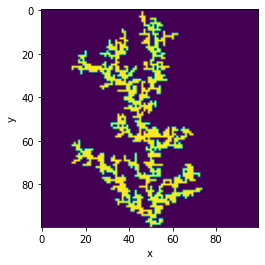

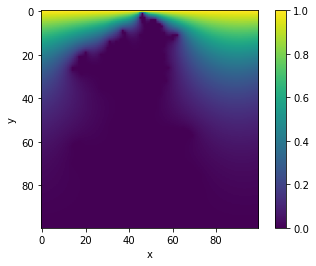

In [ ]:
w_list = [1.8, 1.85, 1.9, 1.95,2]
k_ave = []
k_sd = []
for w in w_list:
    iter_list = []
    for i in range(5):
        Y = np.copy(grid)
        k = itter(seed, Y, 1, max_iter, neighbours, w)
        iter_list.append(k)
    k_ave.append(np.mean(iter_list))
    k_sd.append(np.std(iterlist))

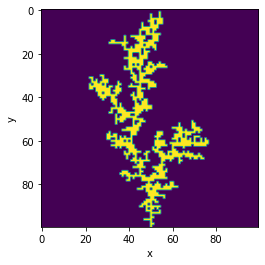

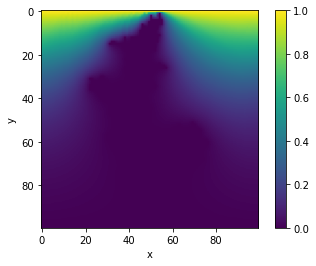

for a eta of  1 we needed k= 1004 iterations


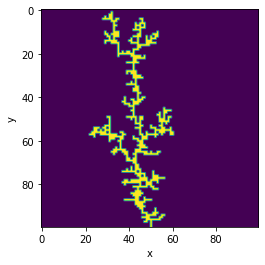

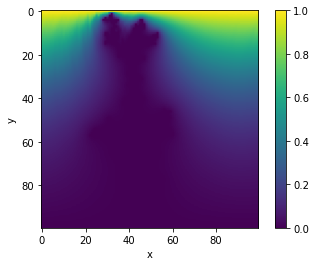

for a eta of  1.5 we needed k= 603 iterations


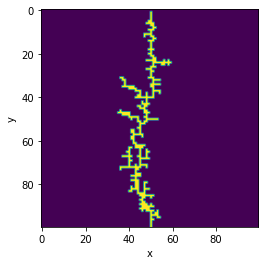

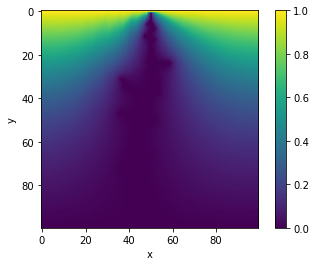

for a eta of  2 we needed k= 355 iterations


In [14]:
eta_list = [1,1.5,2]
w = 1.95
for eta in eta_list:
    Y = np.copy(grid)
    k = itter(seed, Y, eta, max_iter, neighbours, w)
    print("for a eta of ", eta, "we needed k=", k ,"iterations")

In [10]:
eta_list = [0.1,0.5]
w = 1.95
for eta in eta_list:
    Y = np.copy(grid)
    k = itter(seed, Y, eta, 1000, neighbours, w)
    print("for a eta of ", eta, "we needed k=", k ,"iterations")

KeyboardInterrupt: 